# Mini Proyecto 2 - Aprendizaje Supervisado
## Importado de Librerias

In [47]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [48]:
dt_kmeans1 = pd.read_csv('kmeans1.csv')
dt_kmeans1 = ((dt_kmeans1-dt_kmeans1.min())/(dt_kmeans1.max()-dt_kmeans1.min()))
dt_kmeans1

,A,B
0,0.067984,0.047531
1,0.089996,0.141370
2,0.154003,0.217274
3,0.070053,0.039205
4,0.135982,0.174007
...,...,...
395,0.808373,0.861954
396,0.748874,0.856455
397,0.801689,0.908569
398,0.795829,0.858399


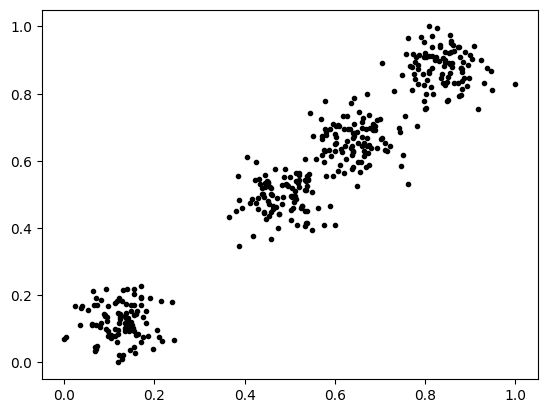

In [49]:
plt.plot(dt_kmeans1['A'], dt_kmeans1['B'], 'k.')
plt.show()

### Al graficar los datos cargados desde `kmeans1.csv` se puede apreciar que se forman 4 grupos diferentes de datos.  

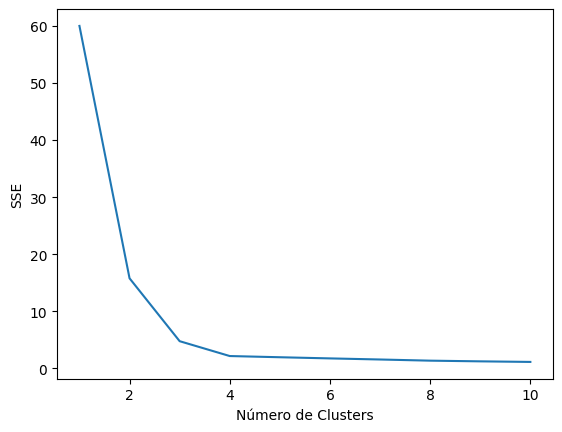

In [50]:
scores = dict()
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=1000).fit(dt_kmeans1)
  scores.update({i: kmeans.inertia_})

plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()

### Dado el grafico de clusters/inertia, se aprecia el el número de clusters ideal es de 3

In [51]:
_kmeans1 = KMeans(n_clusters=3, max_iter=1000)
_kmeans1.fit(dt_kmeans1)

KMeans(max_iter=1000, n_clusters=3)

In [52]:
print(_kmeans1.cluster_centers_, _kmeans1.inertia_)
print(_kmeans1.labels_)

[[0.55760139 0.56946478]
 [0.12488096 0.1225848 ]
 [0.82666814 0.86490252]] 4.777830629096788
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [53]:
# dt_kmeans1['labels'] = _kmeans1.labels_
# colors = ['r.', 'g.', 'b.', 'y.']
# for i in range(0,4):
#   plt.plot(dt_kmeans1['A'][dt_kmeans1['labels']==i], dt_kmeans1['B'][dt_kmeans1['labels']==i], colors[i])
# plt.ylabel('X_2')
# plt.xlabel('X_1')
# plt.show()

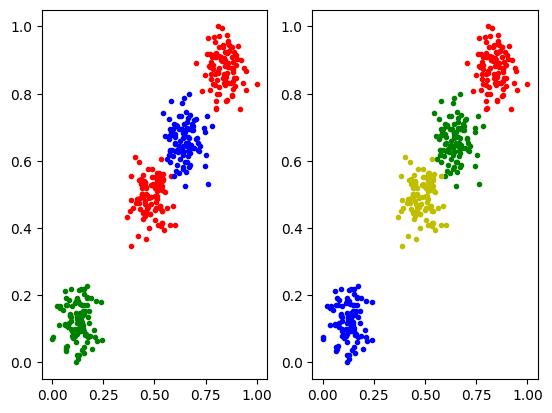

In [58]:
_kmeans1_n3, _kmeans1_n4 = KMeans(n_clusters=3, max_iter=1000), KMeans(n_clusters=4, max_iter=1000)
_kmeans1_n3.fit(dt_kmeans1), _kmeans1_n4.fit(dt_kmeans1)
dt_kmeans1['labels_0'] = _kmeans1_n3.labels_
dt_kmeans1['labels_1'] = _kmeans1_n4.labels_
colors = ['r.', 'g.', 'b.', 'y.']
fig, axs = plt.subplots(1, 2)

for ax in range(len(axs)):
  for i in range(0,4):
    axs[ax].plot(dt_kmeans1['A'][dt_kmeans1[f'labels_{ax}']==i], dt_kmeans1['B'][dt_kmeans1[f'labels_{ax}']==i], colors[i])

#for i in range(0,4):
#  plt.plot(dt_kmeans1['A'][dt_kmeans1['labels']==i], dt_kmeans1['B'][dt_kmeans1['labels']==i], colors[i])
#
#
#axs[0, 0].plot(data['tiempo'], data['magnitud'], '.')
#axs[0, 0].set_title('Polinomio Grado 3')
#axs[0, 1].plot(data['tiempo'], data['magnitud'], '.')
#axs[0, 1].set_title('Polinomio Grado 6')
#for ax in axs.flat:
#  ax.set(xlabel='Tiempo', ylabel='Magnitud')
#for ax in axs.flat:
#  ax.label_outer()

#_kmeans1 = KMeans(n_clusters=4, max_iter=1000)
#_kmeans1.fit(dt_kmeans1)